In [28]:
#Importar bibliotecas
import numpy as np
import tensorflow as tf
from keras import optimizers

In [29]:
#Configurar variáveis
dataset_input = "bin/dataset_input_antihorario.txt"
dataset_output = "bin/dataset_output_antihorario.txt"

In [30]:
#Inputando os dados
inputMatrix = np.loadtxt(dataset_input,dtype='float',delimiter=";")
outputMatrix = np.loadtxt(dataset_output,dtype='float',delimiter=";")#,usecols=np.arange(0,93))
#outputMatrix = np.array([(120, 5,120),
#                         (123,24,100),
#                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))

[ 7.75786970e+06 -3.63565082e+05  2.39400000e+00  8.55000000e+00
  7.75787770e+06 -3.63571892e+05  2.39900000e+00  0.00000000e+00
 -1.20000000e-02]Input Matrix=[ 0.    -0.012  0.02 ]Output Matrix
[ 7.75786970e+06 -3.63565082e+05  2.39400000e+00  8.55000000e+00
  7.75787770e+06 -3.63571893e+05  2.39900000e+00  0.00000000e+00
 -1.00000000e-03]Input Matrix=[ 0.    -0.001  0.02 ]Output Matrix
[ 7.75786970e+06 -3.63565082e+05  2.39400000e+00  8.55000000e+00
  7.75787770e+06 -3.63571892e+05  2.40000000e+00  0.00000000e+00
  2.10000000e-02]Input Matrix=[0.    0.021 0.02 ]Output Matrix
[ 7.75786970e+06 -3.63565082e+05  2.39400000e+00  8.55000000e+00
  7.75787770e+06 -3.63571894e+05  2.40000000e+00  0.00000000e+00
  4.00000000e-02]Input Matrix=[0.   0.04 0.02]Output Matrix
[ 7.75786970e+06 -3.63565082e+05  2.39400000e+00  8.55000000e+00
  7.75787770e+06 -3.63571892e+05  2.39900000e+00  0.00000000e+00
  6.30000000e-02]Input Matrix=[0.    0.063 0.02 ]Output Matrix
[ 7.75786970e+06 -3.63565082e+05

In [31]:
inputMatrix.view()


array([[ 7.75786970e+06, -3.63565082e+05,  2.39400000e+00, ...,
         2.39900000e+00,  0.00000000e+00, -1.20000000e-02],
       [ 7.75786970e+06, -3.63565082e+05,  2.39400000e+00, ...,
         2.39900000e+00,  0.00000000e+00, -1.00000000e-03],
       [ 7.75786970e+06, -3.63565082e+05,  2.39400000e+00, ...,
         2.40000000e+00,  0.00000000e+00,  2.10000000e-02],
       ...,
       [ 7.75652308e+06, -3.63862102e+05, -1.51600000e+00, ...,
        -1.56000000e+00,  2.52000000e+00,  3.70000000e-02],
       [ 7.75652308e+06, -3.63862081e+05, -1.51600000e+00, ...,
        -1.55900000e+00,  2.41900000e+00,  4.30000000e-02],
       [ 7.75652308e+06, -3.63862032e+05, -1.51600000e+00, ...,
        -1.55500000e+00,  2.31400000e+00,  5.70000000e-02]])

In [32]:
#Criando o modelo 
l0 = tf.keras.layers.Dense(units = 9, input_shape = [9])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 64)
#l3 = tf.keras.layers.Dense(units = 93)
l3 = tf.keras.layers.Dense(units = 3)

"""Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3) """

model = tf.keras.Sequential([l0,l1,l2,l3])

In [33]:
#Compilando o modelo
model.compile(loss='mean_absolute_error', optimizer=optimizers.RMSprop(lr=1e-4))#tf.keras.optimizers.Adam(0.1)), loss='mean_squared_error'

In [34]:
#Treinar o modelo
history = model.fit(inputMatrix,outputMatrix,epochs=500,verbose=False)#epochs inicial=500
print("Finished training the model!")

Finished training the model!


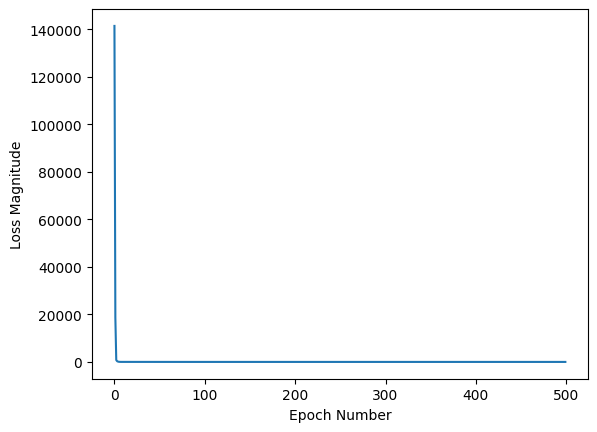

In [35]:
#Exibir estatísticas do treino
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [36]:
#Predição do resultado (minha nn)

#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
#print(model.predict(np.array([7757517.891,-363656.678,-0.250,3.260,-0.250,7757528.493,-363658.826,-0.144,8.55]).reshape(1,9)))
with np.printoptions(precision=6, suppress=True):
    print(model.predict(np.array([7757527.502,-363658.677,-0.154,8.550,7757499.058,-363648.787,-0.527,7.656,0.033]).reshape(1,9)))
#output esperado: 7.656;0.033;0.020
#predição: (v, phi, t)

1/1 [==============================] - 0s 32ms/step
[[8.405555 0.004262 0.022159]]


In [37]:
import emlearn
cmodel = emlearn.convert(model, method='loadable', return_type='regressor')
cmodel.save(file='seqdense_ah.h', name='seqdense')

'#include <eml_net.h>\nstatic const float seqdense_layer0_weights[81] = { 0.324478f, 0.080779f, -0.092828f, -0.393960f, 0.133213f, -0.071711f, 0.227529f, 0.397812f, -0.193211f, -0.256052f, 0.000711f, 0.392271f, 0.310605f, -0.590077f, 0.546297f, 0.265326f, -0.199951f, 0.579818f, 0.374244f, -0.315523f, 0.135547f, 0.262976f, -0.498103f, 0.229455f, 0.385081f, -0.072584f, 0.499034f, 0.477827f, -0.291789f, 0.180258f, -0.270955f, 0.718503f, -0.704444f, -0.565917f, -0.034115f, -0.683210f, -0.321190f, -0.086813f, 0.120229f, 0.421054f, -0.162398f, 0.098528f, -0.212856f, -0.418044f, 0.248923f, 0.325668f, -0.130703f, 0.191290f, 0.266130f, -0.032310f, 0.029455f, 0.048946f, -0.229328f, 0.607342f, 0.451028f, -0.151040f, 0.316827f, 0.261162f, -0.552542f, 0.422805f, 0.575862f, -0.391382f, -0.437047f, 0.520625f, -0.095775f, -0.382476f, 0.295641f, 0.120221f, 0.347369f, -0.333971f, 0.014619f, 0.232838f, -0.111749f, -0.080633f, 0.368089f, 0.493308f, -0.410192f, 0.015746f, 0.263640f, 0.037219f, -0.495775f }

In [32]:
"""Modelo original
#Inputando os dados(modelo original)
inputMatrix = np.array([(100,230,0.95,100),
                        (200,245,0.99,121),
                        ( 40,250,0.91,123)],dtype=float)
outputMatrix = np.array([(120, 5,120),
                         (123,24,100),
                         (154, 3,121)],dtype=float)
for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))
"""

[100.   230.     0.95 100.  ]Input Matrix=[120.   5. 120.]Output Matrix
[200.   245.     0.99 121.  ]Input Matrix=[123.  24. 100.]Output Matrix
[ 40.   250.     0.91 123.  ]Input Matrix=[154.   3. 121.]Output Matrix


In [49]:
"""Primeiros testes
#Entrada dos dados: current x, current y, current phi, current v, current theta, goal_pose x, goal_pose y, goal_pose theta, target v
inputMatrix = np.array([(7757517.727,-363656.637,0.025,3.202,-0.251,7757527.998,-363658.752,-0.149,8.55)],dtype=float)

#Saida dos dados: v, phi, t:
outputMatrix = np.array([(3.218,0.025,0.020)],dtype=float)

for i,c in enumerate(inputMatrix):
    print("{}Input Matrix={}Output Matrix".format(c,outputMatrix[i]))
"""

[ 7.75751773e+06 -3.63656637e+05  2.50000000e-02  3.20200000e+00
 -2.51000000e-01  7.75752800e+06 -3.63658752e+05 -1.49000000e-01
  8.55000000e+00]Input Matrix=[3.218 0.025 0.02 ]Output Matrix


In [7]:
#Modelo inicial: 
l0 = tf.keras.layers.Dense(units = 4, input_shape = [4])
l1 = tf.keras.layers.Dense(units = 64)
l2 = tf.keras.layers.Dense(units = 128)
l3 = tf.keras.layers.Dense(units = 3)

model = tf.keras.Sequential([l0,l1,l2,l3])

In [52]:
#Predição do resultado original
print(model.predict(np.array([120,260,0.98,110]).reshape(1,4)))

1/1 [==============================] - 0s 10ms/step
[[131.42679     5.5687714 137.21587  ]]
